In [108]:
##I. Preparation
##I.0 Imports
##I.1 Read the data
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
raw_data = pd.read_csv("/Users/avanish/Downloads/bestsellers with categories.csv")

In [109]:
raw_data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [110]:
raw_data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [111]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [112]:
raw_data.drop("Name", axis=1, inplace=True)

In [113]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Author       550 non-null    object 
 1   User Rating  550 non-null    float64
 2   Reviews      550 non-null    int64  
 3   Price        550 non-null    int64  
 4   Year         550 non-null    int64  
 5   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 25.9+ KB


In [114]:
##1. Data Understanding
##1.1 Numerical Data
##User Rating

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='User Rating', ylabel='Density'>

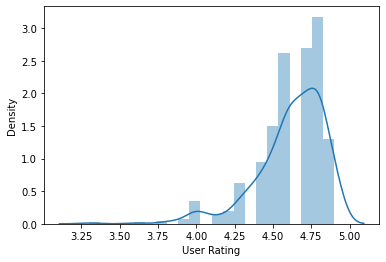

In [115]:
sns.distplot(raw_data["User Rating"])

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='User Rating'>

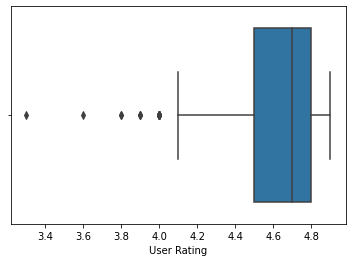

In [116]:
sns.boxplot(raw_data["User Rating"])

In [117]:
raw_data["User Rating"].quantile(0.1)

4.3

In [118]:
##Most User Ratings are between 4.3 and 4.9.
##User Ratings below 4.1 are classified as outliers.

In [119]:
##Price

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

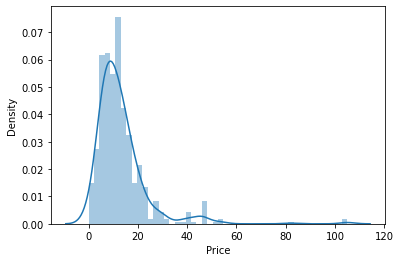

In [120]:
sns.distplot(raw_data["Price"])

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

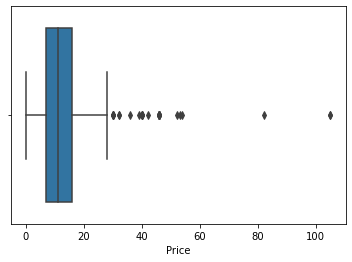

In [121]:
sns.boxplot(raw_data["Price"])

In [122]:
raw_data["Price"].quantile(0.98)

46.0

In [123]:
##There are books, which are significantly more expensive than the average.

In [124]:
##Year

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

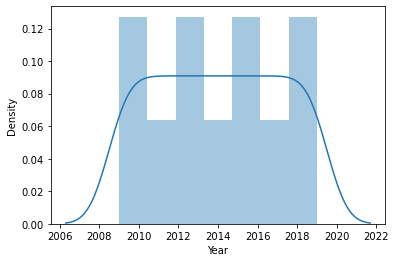

In [125]:
sns.distplot(raw_data["Year"])

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

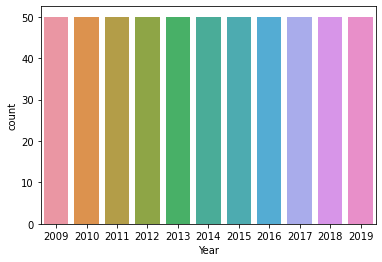

In [126]:
sns.countplot(raw_data["Year"])

In [127]:
##Genre

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='count'>

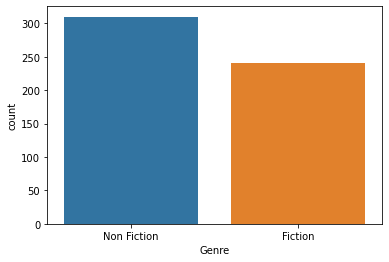

In [128]:
sns.countplot(raw_data["Genre"])

In [129]:
##Fiction Books are underepresented.

In [130]:
##Reviews

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Reviews', ylabel='Density'>

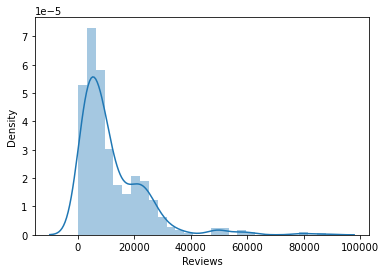

In [131]:
sns.distplot(raw_data["Reviews"])

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

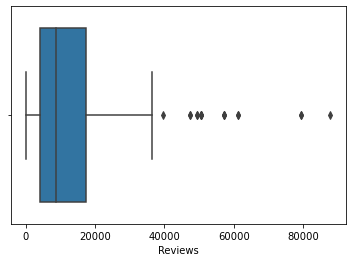

In [132]:
sns.boxplot(raw_data["Reviews"])

In [133]:
raw_data["Reviews"].quantile(0.97)

37996.829999999914

In [134]:
##Several books have way more reviews than the average of the books.

In [135]:
##Categorial Data

In [136]:
raw_data["Author"].value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Anthony Bourdain                       1
Brian Kilmeade                         1
Chris Kyle                             1
Admiral William H. McRaven             1
Sasha O'Hara                           1
Name: Author, Length: 248, dtype: int64

In [137]:
##2. Data Peparation

In [138]:
data_prep = raw_data.loc[(raw_data["Price"] < raw_data["Price"].quantile(0.98)) & (raw_data["User Rating"] > raw_data["User Rating"].quantile(0.01)) & (raw_data["Reviews"] < raw_data["Reviews"].quantile(0.97)) ]

In [139]:
data_prep.describe()

,User Rating,Reviews,Price,Year
count,512.000000,512.000000,512.000000,512.000000
mean,4.634961,10502.916016,11.746094,2014.005859
std,0.199335,8302.943829,7.140331,3.207435
min,4.000000,37.000000,0.000000,2009.000000
25%,4.500000,3820.000000,7.000000,2011.000000
50%,4.700000,7814.500000,10.000000,2014.000000
75%,4.800000,16001.750000,15.000000,2017.000000
max,4.900000,36348.000000,42.000000,2019.000000


In [140]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512 entries, 0 to 549
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Author       512 non-null    object 
 1   User Rating  512 non-null    float64
 2   Reviews      512 non-null    int64  
 3   Price        512 non-null    int64  
 4   Year         512 non-null    int64  
 5   Genre        512 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 28.0+ KB


In [141]:
##2.2 One-hot encoding

In [142]:
data_prep.drop("Author", axis=1, inplace=True)
data_enc = pd.get_dummies(data_prep, drop_first = True)

/Users/avanish/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [143]:
data_enc

,User Rating,Reviews,Price,Year,Genre_Non Fiction
0,4.7,17350,8,2016,1
1,4.6,2052,22,2011,0
2,4.7,18979,15,2018,1
3,4.7,21424,6,2017,0
4,4.8,7665,12,2019,1
...,...,...,...,...,...
545,4.9,9413,8,2019,0
546,4.7,14331,8,2016,1
547,4.7,14331,8,2017,1
548,4.7,14331,8,2018,1


In [144]:
##2.3 Scale the numerical features

In [145]:
# target variables and predictors
y = data_enc["User Rating"]
X = data_enc.drop(["User Rating"], axis = 1)

In [146]:
# Scale between 0 and 1
from sklearn.preprocessing import MinMaxScaler

cols = []

for col in X.columns:
    cols.append(col)
    

num_features = cols
scaler = MinMaxScaler(feature_range = (0,1))


X[num_features] = scaler.fit_transform(X[num_features])
X.head()

,Reviews,Price,Year,Genre_Non Fiction
0,0.476798,0.190476,0.7,1.0
1,0.055493,0.523810,0.2,0.0
2,0.521660,0.357143,0.9,1.0
3,0.588995,0.142857,0.8,0.0
4,0.210074,0.285714,1.0,1.0


In [147]:
##2.4 Check correlation and multi-collinearity

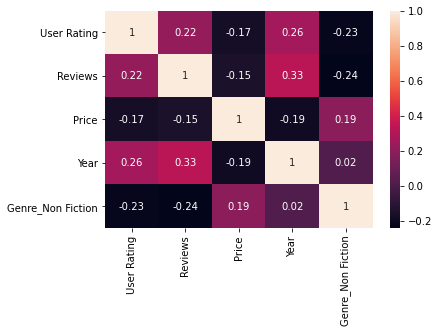

In [195]:
corr_mat = data_enc.corr()
sns.heatmap(corr_mat, annot = True)
plt.show()

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set 
vif_test = X
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_test.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(vif_test.values, i) 
                          for i in range(len(vif_test.columns))] 
  
print(vif_data)

             feature       VIF
0            Reviews  2.636878
1              Price  2.563919
2               Year  3.229829
3  Genre_Non Fiction  2.317381


In [150]:
##No multi-collinearity as none of the features have an VIF of over 10.

In [151]:
##3. Modeling¶
##3.0 Build Training- and Testset

In [152]:
# Split data in test and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [153]:
##3.1 Linear Regression

In [154]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)

In [155]:
##Evaluation

In [156]:
print(y.max())
print(y.min())

4.9
4.0


In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_hat)))
print("Mean Square Error: " + str(mean_squared_error(y_test, y_hat)))
print("Root Mean Square Error: " + str(math.sqrt(mean_squared_error(y_test, y_hat))))
print("R2: " + str(r2_score(y_test, y_hat)))

Mean Absolute Error: 0.1250561331759492
Mean Square Error: 0.028805491835403443
Root Mean Square Error: 0.16972180718871527
R2: 0.20126120522269975


In [158]:
##3.2 Decision Tree

In [159]:
from sklearn.tree import DecisionTreeRegressor

regr_tree_2 = DecisionTreeRegressor(max_depth=2)
regr_tree_2.fit(X, y)
y_hat_tree_2 = regr_tree_2.predict(X_test)

In [160]:
print("Decision Tree with depth 2:")
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_hat_tree_2)))
print("Mean Square Error: " + str(mean_squared_error(y_test, y_hat_tree_2)))
print("Root Mean Square Error: " + str(math.sqrt(mean_squared_error(y_test, y_hat_tree_2))))
print("R2: " + str(r2_score(y_test, y_hat_tree_2)))

Decision Tree with depth 2:
Mean Absolute Error: 0.13103263422034706
Mean Square Error: 0.029540956399677347
Root Mean Square Error: 0.17187482770806592
R2: 0.180867730151132


In [161]:
##Hyperparameter Tuning Decision Tree

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
# define the parameter values that should be searched
k_range = list(range(1, 11))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [164]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=k_range)
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [165]:
# instantiate the grid
grid = GridSearchCV(regr_tree_2, param_grid, cv=10, scoring='neg_root_mean_squared_error', return_train_score=False)

In [166]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=2),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_root_mean_squared_error')

In [167]:
print("Highest score of " + str(grid.best_score_) + " with the parameters: " + str(grid.best_params_) + ".")

Highest score of -0.1932665810472853 with the parameters: {'max_depth': 2}.


In [168]:
##Best Tree:

In [169]:
from sklearn.tree import DecisionTreeRegressor

regr_tree_best = DecisionTreeRegressor(max_depth=2)
regr_tree_best.fit(X, y)
y_hat_tree_best = regr_tree_2.predict(X_test)

In [170]:
print("Best Tree")
print("Absolute Error : " + str(mean_absolute_error(y_test, y_hat_tree_best)))
print("Mean Square Error : " + str(mean_squared_error(y_test, y_hat_tree_best)))
print("Root Mean Square Error : " + str(math.sqrt(mean_squared_error(y_test, y_hat_tree_best))))
print("R2: " + str(r2_score(y_test, y_hat_tree_best)))

Best Tree
Absolute Error : 0.13103263422034706
Mean Square Error : 0.029540956399677347
Root Mean Square Error : 0.17187482770806592
R2: 0.180867730151132


In [171]:
##3.3 Random Forest

In [172]:
from sklearn.ensemble import RandomForestRegressor
regr_rtree_2 = RandomForestRegressor(max_depth=2, random_state=0)
regr_rtree_2.fit(X, y)
y_hat_rtree_2 = regr_rtree_2.predict(X_test)

In [173]:
print("Für Random Forest mit Tiefe 2:")
print("Der Mean Absolute Error beträgt: " + str(mean_absolute_error(y_test, y_hat_rtree_2)))
print("Der Mean Square Error beträgt: " + str(mean_squared_error(y_test, y_hat_rtree_2)))
print("Der Root Mean Square Error beträgt: " + str(math.sqrt(mean_squared_error(y_test, y_hat_rtree_2))))
print("Der R2 beträgt: " + str(r2_score(y_test, y_hat_rtree_2)))

Für Random Forest mit Tiefe 2:
Der Mean Absolute Error beträgt: 0.12609334267950575
Der Mean Square Error beträgt: 0.027652676830579568
Der Root Mean Square Error beträgt: 0.16629094031419622
Der R2 beträgt: 0.23322726477883282


In [174]:
##Hyperparameter Tuning Random Forest

In [175]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)
n_estimators = list(range(10, 210, 10))
print(n_estimators)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [176]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=k_range, n_estimators=n_estimators, random_state=[101])
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'random_state': [101]}


In [177]:
# instantiate the grid
grid = GridSearchCV(regr_rtree_2, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=False)

In [178]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(max_depth=2, random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200],
                         'random_state': [101]},
             scoring='neg_root_mean_squared_error')

In [179]:
print("Highest score of " + str(grid.best_score_) + " with the parameters: " + str(grid.best_params_) + ".")

Highest score of -0.1920158341748002 with the parameters: {'max_depth': 2, 'n_estimators': 80, 'random_state': 101}.


In [180]:
from sklearn.ensemble import RandomForestRegressor
regr_rtree_best = RandomForestRegressor(max_depth=2, n_estimators=80, random_state=101)
regr_rtree_best.fit(X, y)
y_hat_rtree_best = regr_rtree_2.predict(X_test)

In [181]:
##Best Random Forest:

In [182]:
print("Best Random Forest:")
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_hat_rtree_best)))
print("Mean Square Error: " + str(mean_squared_error(y_test, y_hat_rtree_best)))
print("Root Mean Square Error: " + str(math.sqrt(mean_squared_error(y_test, y_hat_rtree_best))))
print("R2 : " + str(r2_score(y_test, y_hat_rtree_best)))

Best Random Forest:
Mean Absolute Error: 0.12609334267950575
Mean Square Error: 0.027652676830579568
Root Mean Square Error: 0.16629094031419622
R2 : 0.23322726477883282


In [183]:
##3.4 Support Vector Machine

In [184]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_hat_svm = svm_model.predict(X_test)

In [185]:
print("Support Vector Machine:")
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_hat_svm)))
print("Mean Square Error: " + str(mean_squared_error(y_test, y_hat_svm)))
print("Root Mean Square Error: " + str(math.sqrt(mean_squared_error(y_test, y_hat_svm))))
print("R2: " + str(r2_score(y_test, y_hat_svm)))


Support Vector Machine:
Mean Absolute Error: 0.12380166048574763
Mean Square Error: 0.02947342349873135
Root Mean Square Error: 0.17167825575398693
R2: 0.1827403295921568


In [186]:
##Hyperparameter Tuning SVM

In [187]:
# define the parameter values that should be searched
c_range = list(range(1, 210, 10))
kernels = ["linear", "poly", "rbf", "sigmoid"]

In [188]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=c_range, kernel=kernels)
print(param_grid)

{'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}


In [189]:
# instantiate and fit the grid
grid = GridSearchCV(svm_model, param_grid, cv=5, scoring='neg_root_mean_squared_error', return_train_score=False)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111,
                               121, 131, 141, 151, 161, 171, 181, 191, 201],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_root_mean_squared_error')

In [190]:
print("Highest score of " + str(grid.best_score_) + " with the parameters: " + str(grid.best_params_) + ".")

Highest score of -0.18727412738623778 with the parameters: {'C': 61, 'kernel': 'linear'}.


In [191]:
svm_model_best = SVR(C=61, kernel="linear")
svm_model_best.fit(X_train, y_train)
y_hat_svm_best = svm_model.predict(X_test)

In [192]:
##Best SVM:

In [193]:
print("Support Vector Machine:")
print("Absolute Error: " + str(mean_absolute_error(y_test, y_hat_svm_best)))
print("Mean Square Error: " + str(mean_squared_error(y_test, y_hat_svm_best)))
print("Root Mean Square Error: " + str(math.sqrt(mean_squared_error(y_test, y_hat_svm_best))))
print("R2: " + str(r2_score(y_test, y_hat_svm_best)))

Support Vector Machine:
Absolute Error: 0.12380166048574763
Mean Square Error: 0.02947342349873135
Root Mean Square Error: 0.17167825575398693
R2: 0.1827403295921568


In [194]:
##3.5 Conclusion
##The best model with the target metric Root Mean Square Error is the Random Forest with depth 2.